In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk2110/main/data/scientists.csv")
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [11]:
print(df['Age'])
print(df['Age'].mean())
#### 평균나이보다 많은 사람을 출력하시오.
# 마스킹
df[df['Age'] > df['Age'].mean()]
# 마스크
df['Age'] > df['Age'].mean()
df[[False,True,True,True,False,False,False,True]]
df['Age'][df['Age'] > df['Age'].mean()]

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64
59.125


1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [24]:
df
#df.info(df['Died'] - df['Born'])
Born = pd.to_datetime(df['Born'], format='%Y-%m-%d')# 1999-12-10
# pd.to_datetime(19991210, format='%Y%m%d')
Died = pd.to_datetime(df['Died'], format='%Y-%m-%d')
df['Born_dt'] , df['Died_dt'] = Born, Died
df
df.info()
df['age_days_dt'] = (Died - Born) / 365

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   Born_dt     8 non-null      datetime64[ns]
 6   Died_dt     8 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 576.0+ bytes


In [27]:
### DataFrame에 있는 데이터를 파일에 저장
df.to_csv("df.csv")
df.to_csv("df.tsv" , sep="\t")
df.to_csv("df1.csv", index=False)

In [28]:
import xlwt
df.to_excel('df.xls')

C:\Users\SCOOL\AppData\Local\Temp\ipykernel_9532\2880873007.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel('df.xls')


In [30]:
import openpyxl
df.to_excel('df.xlsx')

In [31]:
df.to_excel('df1.xlsx',index=False)

In [33]:
df = df.drop(['Born_dt', 'Died_dt', 'age_days_dt'], axis = 1)
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [34]:
df = df.drop([1,3,5], axis = 0)
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [ ]:
# pandas 의 시계열
# 타임스템프 (timestamp : 1970년도 1월1일부터 현재까지의 시간을 ms로 계산,325233353)
# 시간 간격, 기간 ( period )
# 시간 델타, 지속기간( duration )

In [35]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [36]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [42]:
date.strftime('%W')

'26'

In [43]:
# numpy
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [44]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [45]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [46]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [47]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [48]:
# pandas
date = pd.to_datetime("4th of July, 2015")

In [51]:
date.strftime("%W")

'26'

In [52]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [63]:
#시간으로 인덱싱하기
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data =  pd.Series([0,1,2,3], index = index)
data
data['2014-07-04']
data['2014-07-04':'2015-07-04']
data['2015']
data['2015-07']

2015-07-04    2
dtype: int64

In [64]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [69]:
dates[1] - dates[0]
dates  -  dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [80]:
# date_range
pd.date_range('2015-07-03',periods = 8, freq='D')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [72]:
pd.date_range('2015-07-03',periods = 8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [79]:
pd.date_range('2015-07-31',periods = 8, freq='M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [96]:
pd.date_range( 5 ,periods = 8, freq='H')

DatetimeIndex(['1970-01-01 00:00:00.000000005',
               '1970-01-01 01:00:00.000000005',
               '1970-01-01 02:00:00.000000005',
               '1970-01-01 03:00:00.000000005',
               '1970-01-01 04:00:00.000000005',
               '1970-01-01 05:00:00.000000005',
               '1970-01-01 06:00:00.000000005',
               '1970-01-01 07:00:00.000000005'],
              dtype='datetime64[ns]', freq='H')

In [121]:
pd.timedelta_range(0, periods = 14, freq='D')
pd.timedelta_range(0, periods = 14, freq='H')
pd.timedelta_range("00:00:00", periods = 14, freq='H')
pd.timedelta_range(0, periods = 14, freq='2H30T')
pd.timedelta_range(0, periods = 14, freq='3D')

TimedeltaIndex([ '0 days',  '3 days',  '6 days',  '9 days', '12 days',
                '15 days', '18 days', '21 days', '24 days', '27 days',
                '30 days', '33 days', '36 days', '39 days'],
               dtype='timedelta64[ns]', freq='3D')

In [123]:
pd.date_range('2022-05-13',  periods=5 , freq='D')

DatetimeIndex(['2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16',
               '2022-05-17'],
              dtype='datetime64[ns]', freq='D')

In [124]:
from pandas.tseries.offsets import BDay
pd.date_range('2022-05-13',  periods=5 , freq=BDay())

DatetimeIndex(['2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19'],
              dtype='datetime64[ns]', freq='B')

In [165]:
from pandas_datareader import data
yahoo = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
yahoo = yahoo['Close']
# yahoo종가 
# yahoo['Close']

In [6]:
import matplotlib.pyplot as plt

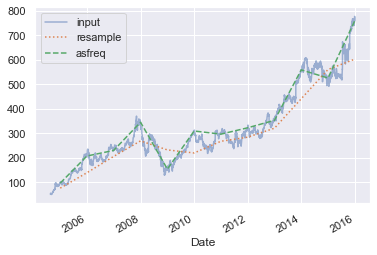

In [149]:
yahoo.plot(alpha=0.5, style='-')
yahoo.resample('BA').mean().plot(style=":")
yahoo.asfreq('BA').plot(style="--")
plt.legend(['input', 'resample', 'asfreq'], loc = 'upper left')

In [49]:
yahoo.resample('BA').mean()
yahoo.asfreq('BA')

Date
2004-12-31     96.035034
2005-12-30    206.655411
2006-12-29    229.380234
2007-12-31    344.448914
2008-12-31    153.250580
2009-12-31    308.832428
2010-12-31    295.875977
2011-12-30    321.744019
2012-12-31    352.369232
2013-12-31    558.262512
2014-12-31    524.958740
2015-12-31    758.880005
Freq: BA-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

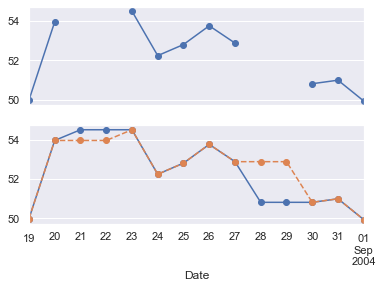

In [150]:
fig, ax = plt.subplots(2, sharex=True)
data = yahoo.iloc[:10]
data.asfreq('D').plot(ax=ax[0] ,marker='o')
data.asfreq('D', method='bfill' ).plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill' ).plot(ax=ax[1], style='--o')

In [170]:
data1 = yahoo.asfreq('D').iloc[:10]
data1
#print(data1.fillna(method='ffill'))
print(data1.fillna(method='pad'))

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    53.952770
2004-08-22    53.952770
2004-08-23    54.495735
2004-08-24    52.239197
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-28    52.876804
Freq: D, Name: Close, dtype: float64


In [174]:
print(yahoo.asfreq('D').head())
print(yahoo.asfreq('D', method='pad'))
print(yahoo.asfreq('D', method='ffill'))

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21          NaN
2004-08-22          NaN
2004-08-23    54.495735
Freq: D, Name: Close, dtype: float64
Date
2004-08-19     49.982655
2004-08-20     53.952770
2004-08-21     53.952770
2004-08-22     53.952770
2004-08-23     54.495735
                 ...    
2015-12-27    748.400024
2015-12-28    762.510010
2015-12-29    776.599976
2015-12-30    771.000000
2015-12-31    758.880005
Freq: D, Name: Close, Length: 4152, dtype: float64
Date
2004-08-19     49.982655
2004-08-20     53.952770
2004-08-21     53.952770
2004-08-22     53.952770
2004-08-23     54.495735
                 ...    
2015-12-27    748.400024
2015-12-28    762.510010
2015-12-29    776.599976
2015-12-30    771.000000
2015-12-31    758.880005
Freq: D, Name: Close, Length: 4152, dtype: float64


In [182]:
# shift(), tshift()
yahoo.iloc[0:20]
data2 = yahoo.shift(10).iloc[0:20]
data2

Date
2004-08-19          NaN
2004-08-20          NaN
2004-08-23          NaN
2004-08-24          NaN
2004-08-25          NaN
2004-08-26          NaN
2004-08-27          NaN
2004-08-30          NaN
2004-08-31          NaN
2004-09-01          NaN
2004-09-02    49.982655
2004-09-03    53.952770
2004-09-07    54.495735
2004-09-08    52.239197
2004-09-09    52.802086
2004-09-10    53.753517
2004-09-13    52.876804
2004-09-14    50.814533
2004-09-15    50.993862
2004-09-16    49.937820
Name: Close, dtype: float64

C:\Users\SCOOL\AppData\Local\Temp\ipykernel_13972\1261222075.py:6: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  yahoo.tshift(900).plot(ax=ax[2])


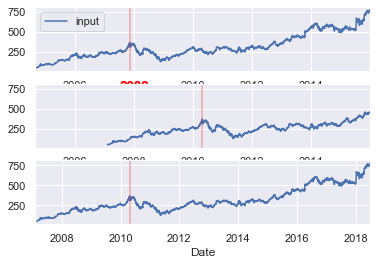

In [196]:
fig, ax = plt.subplots(3, sharey=True)
yahoo = yahoo.asfreq('D', method='pad')

yahoo.plot(ax=ax[0])
yahoo.shift(900).plot(ax=ax[1])
yahoo.tshift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900,'D')

ax[0].legend(['input'], loc = 2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

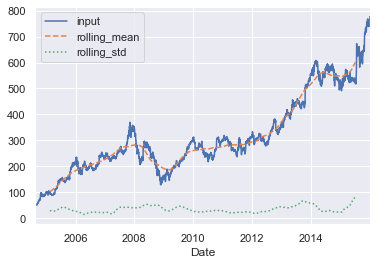

In [203]:
rolling = yahoo.rolling(365, center=True)
data = pd.DataFrame({'input':yahoo, 
                    'rolling_mean' : rolling.mean(),
                    'rolling_std' : rolling.std()})
ax = data.plot(style=['-', '--', ':'])

In [206]:
data = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv",
                   index_col='Date' , parse_dates=True)
data


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
...,...,...,...
2022-04-30 19:00:00,164.0,63.0,101.0
2022-04-30 20:00:00,70.0,33.0,37.0
2022-04-30 21:00:00,79.0,15.0,64.0


In [208]:
data.columns = ['West', 'East', 'Total']
data

,West,East,Total
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
...,...,...,...
2022-04-30 19:00:00,164.0,63.0,101.0
2022-04-30 20:00:00,70.0,33.0,37.0
2022-04-30 21:00:00,79.0,15.0,64.0


In [209]:
data['TTotal'] = data['West'] + data['East']
data

,West,East,Total,TTotal
Date,,,,
2019-11-01 00:00:00,12.0,7.0,5.0,19.0
2019-11-01 01:00:00,7.0,0.0,7.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0,12.0
2019-11-01 04:00:00,6.0,5.0,1.0,11.0
...,...,...,...,...
2022-04-30 19:00:00,164.0,63.0,101.0,227.0
2022-04-30 20:00:00,70.0,33.0,37.0,103.0
2022-04-30 21:00:00,79.0,15.0,64.0,94.0


In [215]:
data = data.drop(['Total'], axis=1)

In [217]:
data.dropna().describe()

,West,East,TTotal
count,150135.000000,150135.000000,150135.000000
mean,109.506771,49.640237,159.147008
std,139.596725,64.238043,199.276872
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,20.000000
50%,59.000000,27.000000,87.000000
75%,144.000000,67.000000,212.000000
max,1097.000000,698.000000,1569.000000


<AxesSubplot:xlabel='Date'>

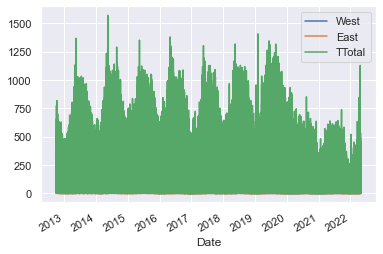

In [218]:
data.plot()

<AxesSubplot:xlabel='Date'>

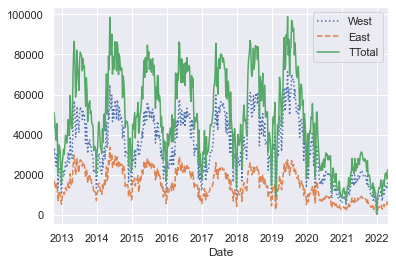

In [221]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])

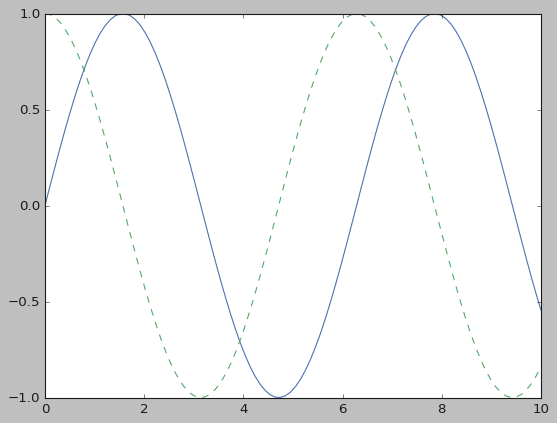

In [233]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
x = np.linspace(0, 10, 100)
x
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x) , '--')

In [234]:
fig.savefig('my_figure.png')

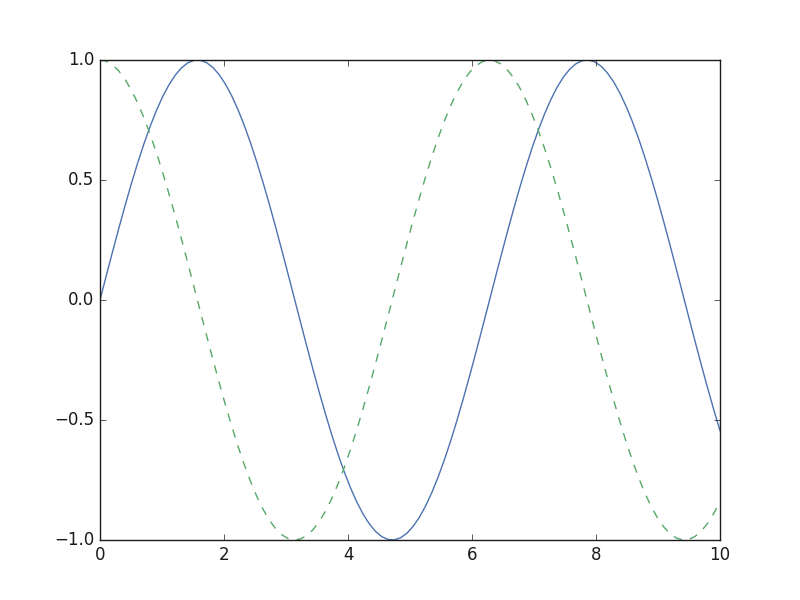

In [235]:
from IPython.display import Image
Image('my_figure.png')

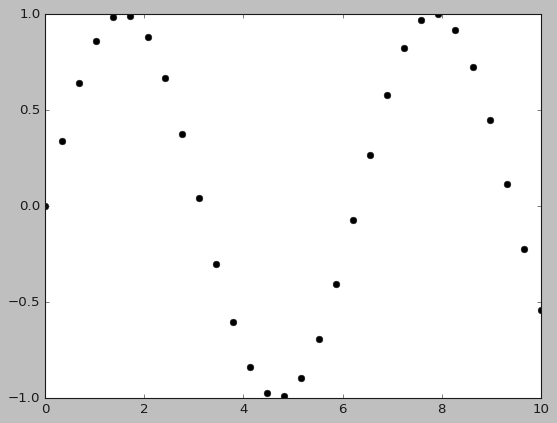

In [239]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o' ,color='black')

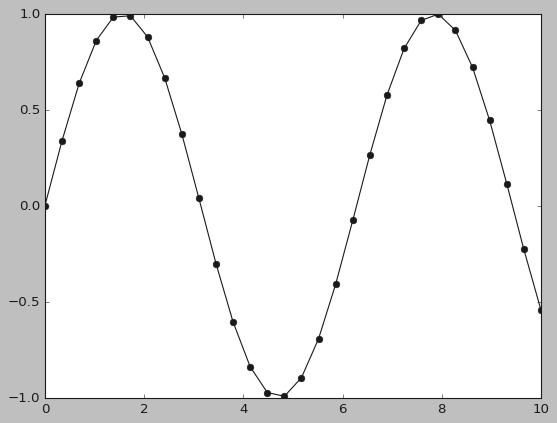

In [243]:
plt.plot(x, y, '-ok');

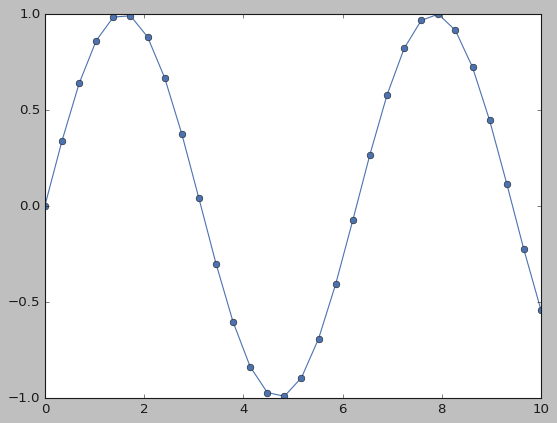

In [245]:
plt.plot(x, y, marker='o');

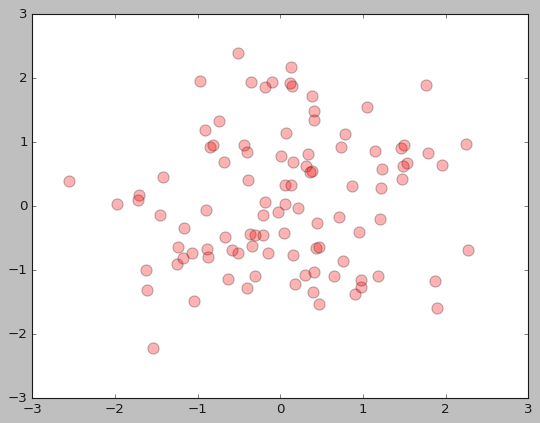

In [251]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
plt.scatter(x, y, c = "red" , s = 100, alpha = 0.3)

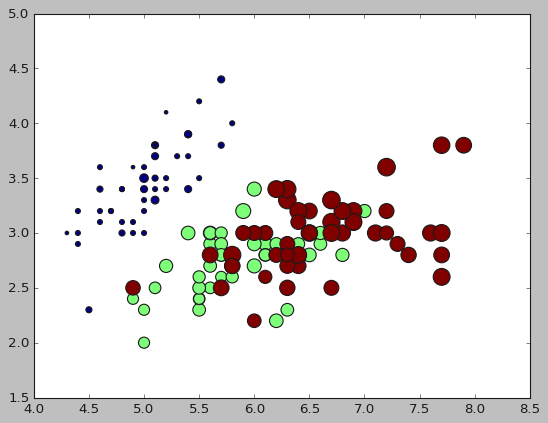

In [260]:
from sklearn.datasets import load_iris
iris = load_iris()
iris
features = iris.data.T
features
plt.scatter(features[0], features[1], s = 100 * features[3] , c= iris.target)

(array([ 1.,  0.,  1.,  2.,  4.,  1., 10.,  8., 10., 12., 11., 27., 32.,
        34., 48., 55., 44., 65., 67., 76., 54., 74., 56., 55., 50., 45.,
        36., 23., 21., 22., 15., 15., 11.,  3.,  5.,  3.,  1.,  1.,  1.,
         1.]),
 array([-3.28091133, -3.119287  , -2.95766267, -2.79603834, -2.63441401,
        -2.47278968, -2.31116535, -2.14954102, -1.98791669, -1.82629236,
        -1.66466803, -1.5030437 , -1.34141937, -1.17979504, -1.01817072,
        -0.85654639, -0.69492206, -0.53329773, -0.3716734 , -0.21004907,
        -0.04842474,  0.11319959,  0.27482392,  0.43644825,  0.59807258,
         0.75969691,  0.92132124,  1.08294557,  1.2445699 ,  1.40619423,
         1.56781856,  1.72944289,  1.89106722,  2.05269155,  2.21431588,
         2.37594021,  2.53756454,  2.69918887,  2.8608132 ,  3.02243753,
         3.18406186]),
 [<matplotlib.patches.Polygon at 0x1e11331a1d0>])

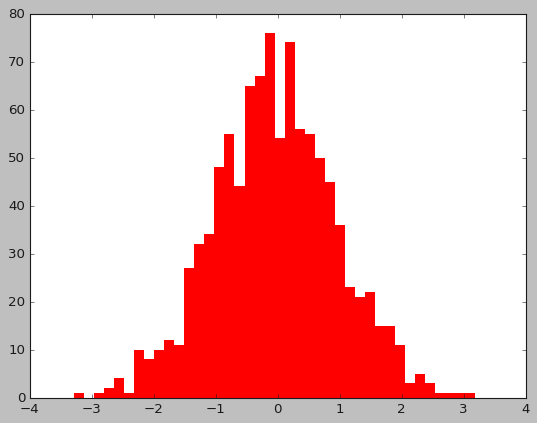

In [270]:
data = np.random.randn(1000)
plt.hist(data, bins=40, histtype='stepfilled', edgecolor='none' ,color='red') # 분포도

(array([ 1.,  0.,  0.,  3.,  1.,  4.,  3.,  2.,  5.,  7., 16., 15., 22.,
        20., 26., 32., 51., 47., 63., 61., 57., 59., 55., 75., 52., 63.,
        42., 41., 31., 41., 27., 25.,  9., 14.,  7., 11.,  5.,  1.,  4.,
         2.]),
 array([-4.22827969, -3.90389966, -3.57951962, -3.25513959, -2.93075955,
        -2.60637952, -2.28199949, -1.95761945, -1.63323942, -1.30885938,
        -0.98447935, -0.66009932, -0.33571928, -0.01133925,  0.31304079,
         0.63742082,  0.96180085,  1.28618089,  1.61056092,  1.93494095,
         2.25932099,  2.58370102,  2.90808106,  3.23246109,  3.55684112,
         3.88122116,  4.20560119,  4.52998123,  4.85436126,  5.17874129,
         5.50312133,  5.82750136,  6.1518814 ,  6.47626143,  6.80064146,
         7.1250215 ,  7.44940153,  7.77378156,  8.0981616 ,  8.42254163,
         8.74692167]),
 [<matplotlib.patches.Polygon at 0x1e114ea8b80>])

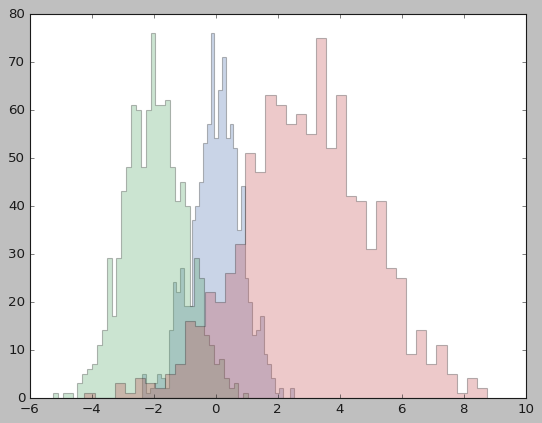

In [274]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype="stepfilled", alpha=0.3, bins=40 )
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

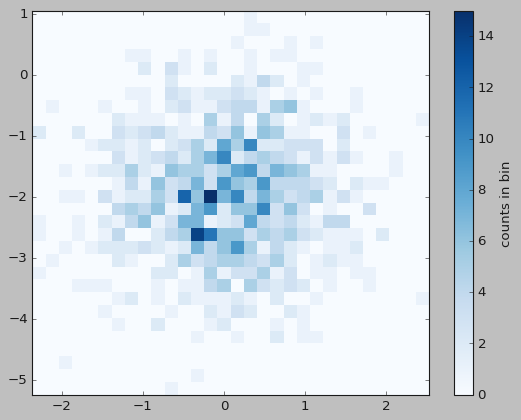

In [283]:
#hist2d
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x1,x2, bins=30,cmap='Blues' );
cb = plt.colorbar()
cb.set_label('counts in bin')

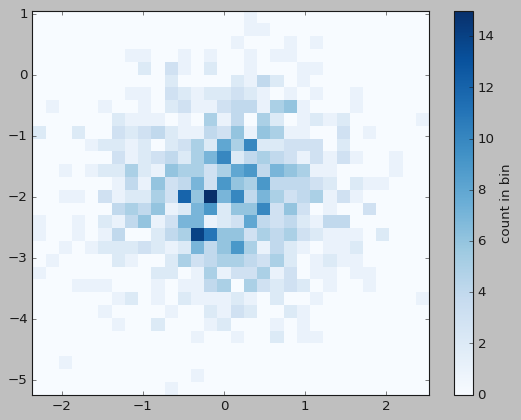

In [284]:
plt.hist2d(x1,x2, bins=30,cmap='Blues' );
cb = plt.colorbar(label='count in bin')

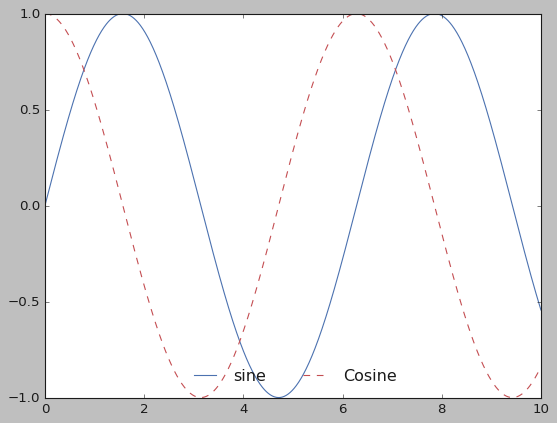

In [292]:
# 범주
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label = 'sine')
ax.plot(x, np.cos(x), '--r', label = 'Cosine')
# ax.legend(loc='upper left', frameon=False)
ax.legend(loc='lower center', frameon=False, ncol= 2)

In [295]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\SCOOL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


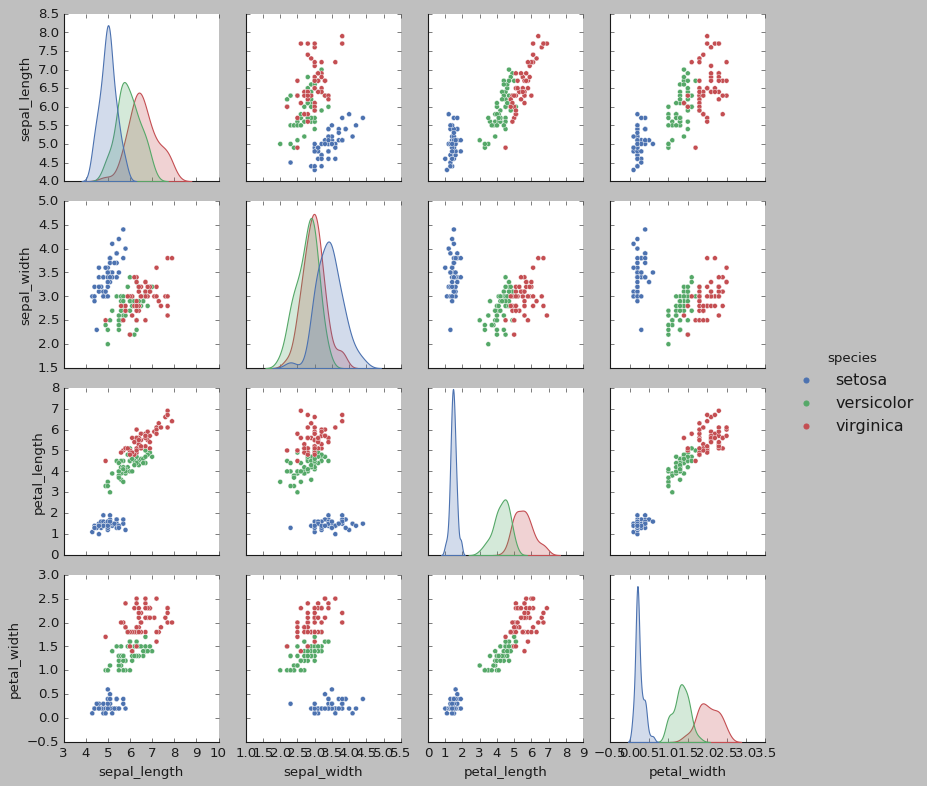

In [296]:
sns.pairplot(iris, hue='species' , size=2.5)

In [297]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


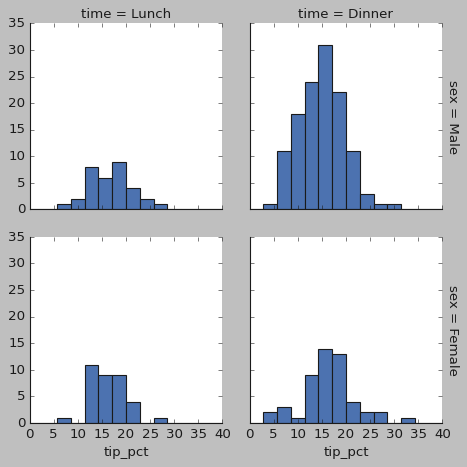

In [305]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips
grid = sns.FacetGrid(tips, row="sex" , col="time", margin_titles=True )
grid.map(plt.hist, 'tip_pct',bins=np.linspace(0, 40, 15));

In [ ]:
import urllib.parse
API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
# 매개변수를 URL 인코딩합니다. --- (※1)
values = {
    'stnId': '108'
}
params = urllib.parse.urlencode(values)
# 요청 전용 URL을 생성합니다. --- (※2)
url = API + "?" + params
print("url=", url)
# 다운로드합니다. --- (※3)
data = urllib.request.urlopen(url).read()
text = data.decode("utf-8")
print(text)